In [7]:
# !pip install seaborn
# !pip install openpyxl

In [2]:
import pandas as pd
from utils import get_tagtog_df
from make_data import get_labels
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# make_data.py의 make_train_data() 긁어옴; split 전까지

tagtog_df = get_tagtog_df()
relation_df = pd.read_excel('./file/relation_for_train_raw.xlsx', engine='openpyxl')

merge_df = pd.merge(tagtog_df, relation_df, on=['id'])
merge_df['exclude'] = merge_df['exclude'].fillna('유지')

df = merge_df.copy() # 1683
df['label'] = get_labels(df)
df = df.loc[df['exclude'] == '유지', :] # 1600
df = df.loc[df['label'] != 'none', :] # 1594
df['source'] = ['wikipedia' for _ in range(len(df))]
df = df.drop(
    columns=[
        'title', 'sentence_with_entity',
        'subject_entity_word', 'subject_entity_start_idx', 'subject_entity_end_idx', 'subject_entity_type',
        'object_entity_word', 'object_entity_start_idx', 'object_entity_end_idx', 'object_entity_type',
        'id', 'relation_1', 'relation_2', 'relation_3', 'correct', 'exclude'
    ]
)

In [4]:
len(df)  # 1594

1594

In [5]:
df.head()  # columns: sentence, subject_entity, object_entity, label, source

,sentence,subject_entity,object_entity,label,source
1,63빌딩은 2007년 - 63빌딩이 테러 당했다는 이미지가 올라왔는데 알고보니 낚시...,"{'word': '63빌딩', 'start_idx': 0, 'end_idx': 3,...","{'word': '2007년', 'start_idx': 6, 'end_idx': 1...",no_relation,wikipedia
2,63빌딩 계단 오르기 대회는 1995년 개관 10주년을 맞이하여 대회가 열렸다.,"{'word': '63빌딩', 'start_idx': 0, 'end_idx': 3,...","{'word': '1995년', 'start_idx': 16, 'end_idx': ...",loc:sites_contained,wikipedia
3,63빌딩의 63스카이아트(영어: 63 Sky Art)는 지상 60층에 위치하고 있다.,"{'word': '63빌딩', 'start_idx': 0, 'end_idx': 3,...","{'word': '63스카이아트(영어: 63 Sky Art)', 'start_idx...",no_relation,wikipedia
4,63빌딩의 워킹 온 더 클라우드(영어: Walking On The Cloud)는 지...,"{'word': '63빌딩', 'start_idx': 0, 'end_idx': 3,...",{'word': '워킹 온 더 클라우드(영어: Walking On The Cloud...,loc:founded,wikipedia
5,"63빌딩의 2층 ~ 20층에는 저층부 사무실, 20층 ~ 36층에는 중층부 사무실,...","{'word': '63빌딩', 'start_idx': 0, 'end_idx': 3,...","{'word': '저층부 사무실', 'start_idx': 17, 'end_idx'...",loc:sites_contained,wikipedia


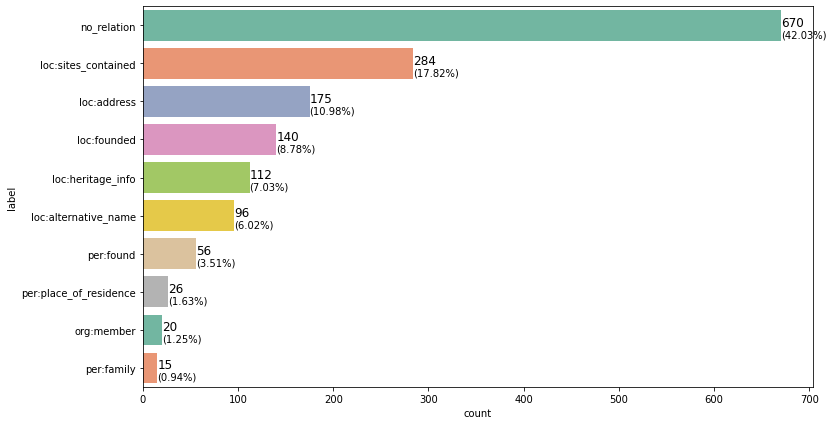

In [8]:
fig, ax = plt.subplots(figsize=(12, 7))

ax = sns.countplot(y=df["label"], palette='Set2', order = df["label"].value_counts().index)

for p in ax.patches:
    ax.annotate(p.get_width(),
        (p.get_width(), p.get_y()+0.5), 
        ha="left", va='bottom',
        fontsize=12
    )
    ax.annotate(f'({100*p.get_width()/len(df):.2f}%)',
        (p.get_width(), p.get_y()+0.5), 
        ha="left", va='top',
        fontsize=10
    )